# Business Problem

Build a model which predicts sales based on the money spent on different platforms for marketing.

# Introduction

The dataset consists of 4 columns namely 'TV','Radio','Newspaper','Sales'. In this notebook, you will address the business problem by finding out the most profitable mode of marketing.

In [1]:
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Data_Science\ds\challenges\Advertising\Advertising.csv')

In [3]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no nulls in data which is a good thing.

# Univariate Analysis:

### Plot a boxplot taking 'Sales' as the feature

<Axes: xlabel='Sales'>

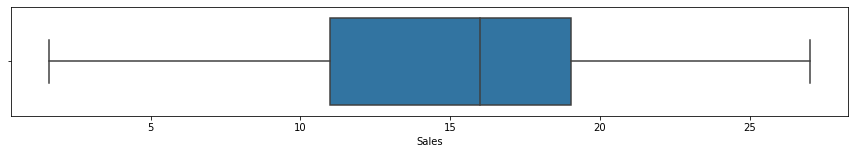

In [8]:
plt.figure(figsize=(15,2))
sns.boxplot(data=df,x='Sales')

### visualize all features against sale

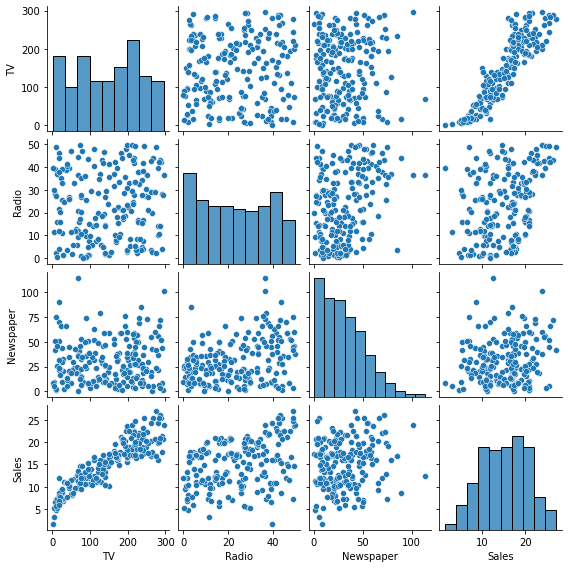

In [9]:
# plt.figure(figsize=(15,2))
sns.pairplot(df,kind='scatter',height=2)

## Which is the medium most affecting the Sales?

Trend can be seen in channel/medium TV

# Find the correlations between all the features using heatmap:

<Axes: >

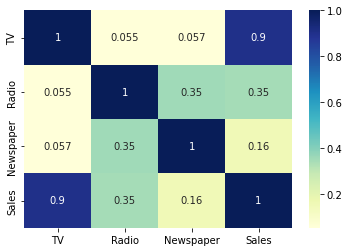

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

## What is a heatmap?

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

### Now, set variable X as the TV feature which is also called as the feature variable and  variable y as the Sales which is the response variable.

In [54]:
x = df['TV']
y = df['Sales']


# x,y = [pd.DataFrame(i) for i in (x,y)]
## Since x has the single features, transfomred into Dataframe to avoid shape issues

# Split the dataset into train and test sets.

In [55]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=42)


# Fit the Simple Regression Model to the train set.

In [56]:
# print(x_train.shape)
# print(y_train.shape)
# x_train = np.array(x_train).reshape(-1,1)
# y_train = np.array(y_train).reshape(-1,1)
# print(x_train.shape)
# print(y_train.shape)

# x,y = [pd.DataFrame(i) for i in (x,y)]

from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_pred = lnr.predict(x_test)





print('1 >> ', x_test.shape)
print('2 >> ', y_test.shape)
print('3 >> ', y_pred.shape)

print('4 >> ', type(x_test))
print('5 >> ', type(y_test))
print('6 >> ', type(y_pred))

x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)


for i in [x_test,y_test,y_pred]:
    i.reset_index(drop=True,inplace=True)

print('7 >> ', y_pred.shape)
print('8 >> ', type(y_pred))
# # y_TestPred = pd.concat([y_test,y_pred],axis=1,ignore_index=True)
print('9 >> ', type(y_pred))

df_test = pd.concat([x_test,y_test,y_pred],axis=1)
df_test.columns = ['TV','Actual_Sale','Predicted_Sale']





1 >>  (46, 1)
2 >>  (46, 1)
3 >>  (46, 1)
4 >>  <class 'numpy.ndarray'>
5 >>  <class 'numpy.ndarray'>
6 >>  <class 'numpy.ndarray'>
7 >>  (46, 1)
8 >>  <class 'pandas.core.frame.DataFrame'>
9 >>  <class 'pandas.core.frame.DataFrame'>


In [57]:
df_test.head()

TV  Actual_Sale  Predicted_Sale
0  163.3         16.9       16.125283
1  195.4         22.4       17.906427
2  292.9         21.4       23.316445
3   11.7          7.3        7.713398
4  220.3         24.7       19.288063

# Visualize the train set results

<Axes: xlabel='TV', ylabel='Sales'>

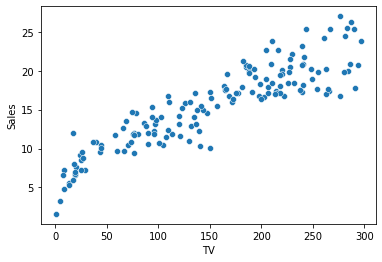

In [61]:
sns.scatterplot(x=x_train['TV'],y=y_train['Sales'])

# Visualize the test set results

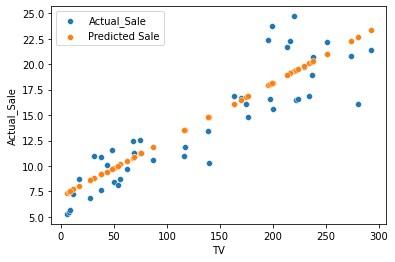

In [67]:
sns.scatterplot(data=df_test,x='TV',y='Actual_Sale',label='Actual_Sale')
sns.scatterplot(data=df_test,x='TV',y='Predicted_Sale',label='Predicted Sale')
plt.show()

#### Accuracy Score

In [72]:
acc_score = round(lnr.score(x_train,y_train)*100,2)
print('10 >>', acc_score)

10 >> 81.24


# Calculate the R squared

R-squared measures the strength of the relationship between our model and the dependent variable on a convenient 0 – 100% scale. It should be closer to 1.

In [81]:
#from sklearn.metrics import r2_score
#r_squared = r2_score(y_test, y_pred)
#r_squared

from sklearn.metrics import r2_score
r2_score = round(r2_score(df_test['Actual_Sale'],df_test['Predicted_Sale']),2)
print('11 >>', r2_score)

11 >> 0.8


In [83]:
## get the full evaluation

def get_regression_eval(a,b):
    #### function to get rsuared, rsquared_adjusted, mse, rmse and mae
    ##### example >> get_regression_eval(y_test,_predict)
    import statsmodels.api as sm
    from sklearn.metrics import mean_squared_error,mean_absolute_error
    import math
    ######################################################################################
    get_stats={}
    print("############## Getting Rsquared and Adjusted Rsquared using Statsmodels ########################")
    import statsmodels.api as sm
    
    a_addConstant = sm.add_constant(a)
    result = sm.OLS(b,a_addConstant).fit()
    get_stats['rsquared'] = result.rsquared
    get_stats['rsquared_adj'] = result.rsquared_adj
    
    print(get_stats)
    print("############## Getting MSE and RMSE using SKlearn ########################")
    get_stats['mse'] = mean_squared_error(a,b)
    get_stats['rmse'] = math.sqrt(mean_squared_error(a,b))
    
    print("############## Getting MAE(mean absolute error) using SKlearn ############")
    get_stats['mae'] = mean_absolute_error(a,b)
    print(get_stats)
    
    
    
    return get_stats

get_regression_eval(df_test['Actual_Sale'],df_test['Predicted_Sale'])

############## Getting Rsquared and Adjusted Rsquared using Statsmodels ########################
{'rsquared': 0.8048661813787849, 'rsquared_adj': 0.8004313218646664}
############## Getting MSE and RMSE using SKlearn ########################
############## Getting MAE(mean absolute error) using SKlearn ############
{'rsquared': 0.8048661813787849, 'rsquared_adj': 0.8004313218646664, 'mse': 5.8164288666146495, 'rmse': 2.411727361584358, 'mae': 1.929824239820264}


{'rsquared': 0.8048661813787849,
 'rsquared_adj': 0.8004313218646664,
 'mse': 5.8164288666146495,
 'rmse': 2.411727361584358,
 'mae': 1.929824239820264}